In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from datetime import date
import re

# 1. Exploration des données

In [3]:
# on commence par charger les labels
h1_labels = pd.read_table('data/house1_labels.txt', header=None, names=['label'], usecols=[0])
h1_labels['label'] = h1_labels['label'].str.extract(r'[0-9]+ (.*)')
h1_labels['label'] = h1_labels['label'].str.replace(re.compile(r'( \(.*\))'), '')

# on définit des groupes, sans les 'L1' / 'L2'
h1_labels['group'] = h1_labels['label'].str.extract(r'(.*) L[0-9]').apply(lambda x: x.fillna(h1_labels['label']))
h1_labels['id'] = (h1_labels.index + 1)

# on définit les id
h1_labels['id'] = h1_labels['id'].apply(lambda x: 'sub'+str(x))

# on définit les équipements qui conditionnent l'activité
lables_map = {'Kitchen Wall Oven': 1, #0
'Kitchen Counter Plugs': 1,
'Upstairs Bedroom AFCI Arc-Fault Plugs': 0, #1
'Clothes Dryer': 1,
'Upstairs Bedroom': 1,
'Kitchen Fridge': 0,
'Clothes Washer': 1,
'Kitchen Dishwasher': 1,
'Furnace & Hot Water Unit': 0,
'Basement Plugs & Lights':0, #1
'Heat Pump': 0,
'Garage Sub-Panel': 0,
'Upstairs Plugs & Lights': 1,
'Basement Blue Plugs': 1,
'Bathrooms': 0,
'Rental Suite Sub-Panel': 0,
'Misc. Plugs': 0, 
'Home Office': 0 #1
}

h1_labels['activity'] = h1_labels['group'].map(lables_map)

h1_labels

,label,group,id,activity
0,Kitchen Wall Oven L1,Kitchen Wall Oven,sub1,1
1,Kitchen Wall Oven L2,Kitchen Wall Oven,sub2,1
2,Kitchen Counter Plugs L1,Kitchen Counter Plugs,sub3,1
3,Kitchen Counter Plugs L2,Kitchen Counter Plugs,sub4,1
4,Clothes Dryer L1,Clothes Dryer,sub5,1
5,Clothes Dryer L2,Clothes Dryer,sub6,1
6,Upstairs Bedroom AFCI Arc-Fault Plugs,Upstairs Bedroom AFCI Arc-Fault Plugs,sub7,0
7,Kitchen Fridge,Kitchen Fridge,sub8,0
8,Clothes Washer,Clothes Washer,sub9,1
9,Kitchen Dishwasher,Kitchen Dishwasher,sub10,1


In [4]:
all_groups = h1_labels.loc[:, 'group'].unique()
labels_active = h1_labels.loc[h1_labels['activity'] > 0, 'group'].unique()

In [4]:
house1_power_blk1 = pd.read_csv('data/house1_power_blk1.zip')
house1_power_blk1['datetime'] = pd.to_datetime(house1_power_blk1['unix_ts'], unit='s')
#house1_power_blk1['datetime'] = house1_power_blk1['datetime'].dt.tz_localize('UTC').dt.tz_convert('America/Vancouver')
house1_power_blk1['datetime'] = house1_power_blk1['datetime'] - pd.Timedelta("8 hours")

house1_power_blk1 = house1_power_blk1.set_index(house1_power_blk1['datetime'])
house1_power_blk1 = house1_power_blk1.drop(columns=['unix_ts', 'datetime'])

# id_label = {id: label for label, id in h1_labels.values}
# house1_power_blk1 = house1_power_blk1.rename(columns=id_label)
for group in all_groups:
    sub_id = h1_labels.loc[h1_labels['group'] == group, 'id'].values
    house1_power_blk1[group] = house1_power_blk1[sub_id].sum(axis=1)
    house1_power_blk1 = house1_power_blk1.drop(columns=sub_id)

house1_power_blk1.head()

,ihd,mains,Kitchen Wall Oven,Kitchen Counter Plugs,Clothes Dryer,Upstairs Bedroom AFCI Arc-Fault Plugs,Kitchen Fridge,Clothes Washer,Kitchen Dishwasher,Furnace & Hot Water Unit,Basement Plugs & Lights,Heat Pump,Garage Sub-Panel,Upstairs Plugs & Lights,Basement Blue Plugs,Bathrooms,Rental Suite Sub-Panel,Misc. Plugs,Home Office
datetime,,,,,,,,,,,,,,,,,,,
2016-02-07 00:00:00,NaN,646,1,2,0,5,0,0,0,139,112,38,1,9,20,113,45,0,161
2016-02-07 00:00:01,NaN,636,1,1,0,5,0,0,0,140,112,38,1,9,20,113,44,0,152
2016-02-07 00:00:02,NaN,640,1,2,0,5,0,0,0,139,112,38,1,9,21,113,45,0,154
2016-02-07 00:00:03,NaN,640,1,2,0,5,0,0,0,140,112,38,1,9,20,113,45,0,154
2016-02-07 00:00:04,NaN,643,1,2,0,7,0,0,0,141,112,38,1,9,21,113,45,0,153


In [7]:
house1_power_blk1.describe()

,ihd,mains,Kitchen Wall Oven,Kitchen Counter Plugs,Clothes Dryer,Upstairs Bedroom AFCI Arc-Fault Plugs,Kitchen Fridge,Clothes Washer,Kitchen Dishwasher,Furnace & Hot Water Unit,Basement Plugs & Lights,Heat Pump,Garage Sub-Panel,Upstairs Plugs & Lights,Basement Blue Plugs,Bathrooms,Rental Suite Sub-Panel,Misc. Plugs,Home Office
count,51781.000000,777600.000000,777600.000000,777600.000000,777600.000000,777600.000000,777600.000000,777600.000000,777600.000000,777600.000000,777600.000000,777600.000000,777600.000000,777600.000000,777600.000000,777600.000000,777600.000000,777600.000000,777600.000000
mean,1357.122188,1343.087585,0.992980,10.063137,45.238618,29.509416,48.878970,2.738471,17.542393,128.008237,119.710684,310.978437,0.999527,95.426109,27.037939,31.551321,302.637508,1.818210,169.955630
std,1019.259753,1018.853946,0.085336,116.419527,446.929881,30.941163,71.115971,29.595356,111.356479,51.924557,40.001579,648.016402,0.043031,149.196118,34.759162,60.570696,496.067432,8.079135,29.116743
min,386.000000,344.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,35.000000,51.000000,0.000000,0.000000,6.000000,10.000000,1.000000,41.000000,0.000000,121.000000
25%,697.000000,684.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,138.000000,101.000000,36.000000,1.000000,9.000000,20.000000,2.000000,47.000000,0.000000,154.000000
50%,941.000000,927.000000,1.000000,2.000000,0.000000,11.000000,0.000000,0.000000,0.000000,145.000000,112.000000,38.000000,1.000000,9.000000,20.000000,2.000000,175.000000,0.000000,156.000000
75%,1508.000000,1494.000000,1.000000,2.000000,0.000000,47.000000,126.000000,0.000000,0.000000,148.000000,112.000000,38.000000,1.000000,156.000000,20.000000,3.000000,307.000000,0.000000,165.000000
max,7933.000000,18115.000000,2.000000,1729.000000,5483.000000,179.000000,1712.000000,1076.000000,806.000000,685.000000,350.000000,13948.000000,2.000000,1447.000000,993.000000,1804.000000,4865.000000,74.000000,919.000000


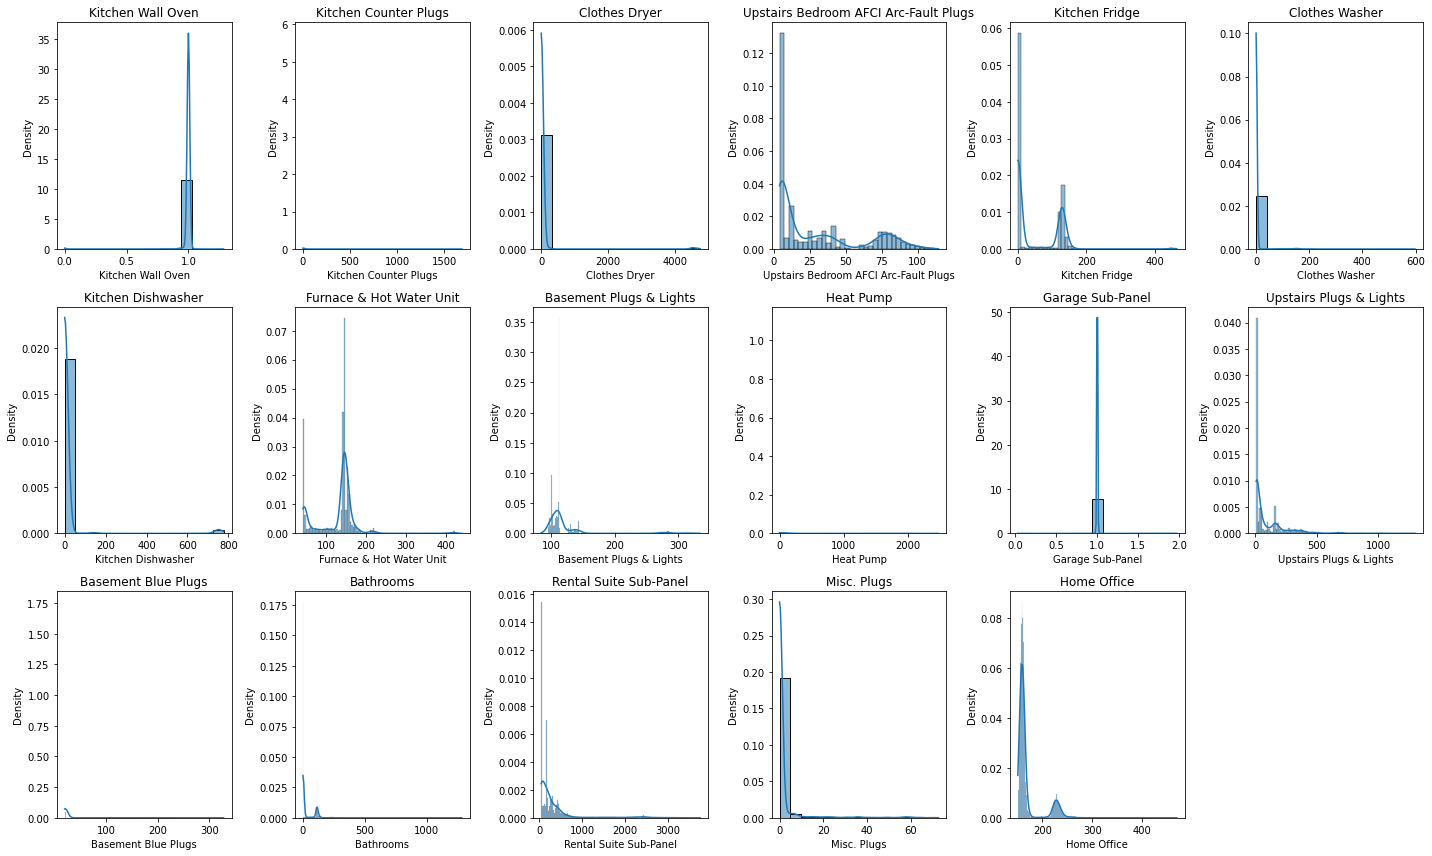

In [6]:
# we prepare our plot
fig = plt.figure(figsize=(20, 12));

house1_power_blk1_agg = house1_power_blk1.resample(rule='60s').mean()

# for each column
for k, col in enumerate(all_groups):
    # we add a subplot
    ax = fig.add_subplot(3, 6, k+1)

    # histogramme voltmean_5d et sa moyenne
    sns.histplot(data=house1_power_blk1_agg, x=col, kde=True, stat='density', ax=ax)
    #ax.vlines(x=house1_power_blk1_agg[col].mean(), ymin=0, ymax=ax.get_ylim()[-1], color='red', alpha=0.7, label='avg')
    ax.set_title(col)
    #ax.legend()

plt.tight_layout()
plt.show();

# 2. Ajout des labels activité

Nous allons labeliser chaque sous compteur avec des seuls sur mesure.

In [7]:
params = pd.DataFrame (data={'tol1mul': [1, 1, 1, 2, 1.6, 1, 1, 1.5, 1, 1, 1, 0.1, 1, 1.1, 0.8, 1,2],
                            'rolling': ['1h', '1h', '1h', '1h', '1h', '1h', '1h', '1h', '1h', '2h', '15s', '45min', '10min', '45min', '1h30min', '5min', '45min'],
                            'tol2': [0, 0, 0, 0, 0.001, 0, 0, 0.1, 0, 0.11, 0, 0, 0.2, 0.4, 0.1, 0.15 , 0.1]})

In [6]:
house1_power_blk1['activity'] = pd.Series(data=np.zeros(len(house1_power_blk1)), index=house1_power_blk1.index, dtype=np.int8)

for i, group in enumerate(all_groups):
    if not h1_labels.loc[h1_labels['group'] == all_groups[i], 'activity'].any():
        continue

    house1_power_blk1['activity'] += ((((house1_power_blk1[group] > house1_power_blk1[group].mean() + house1_power_blk1[group].std() * params.loc[i, 'tol1mul'])*1).rolling(params.loc[i, 'rolling'], center=True).mean() > params.loc[i, 'tol2'])*1)

    house1_power_blk1['activity'] = (house1_power_blk1['activity'] > 0)*1

#activity = activity/activity.max()

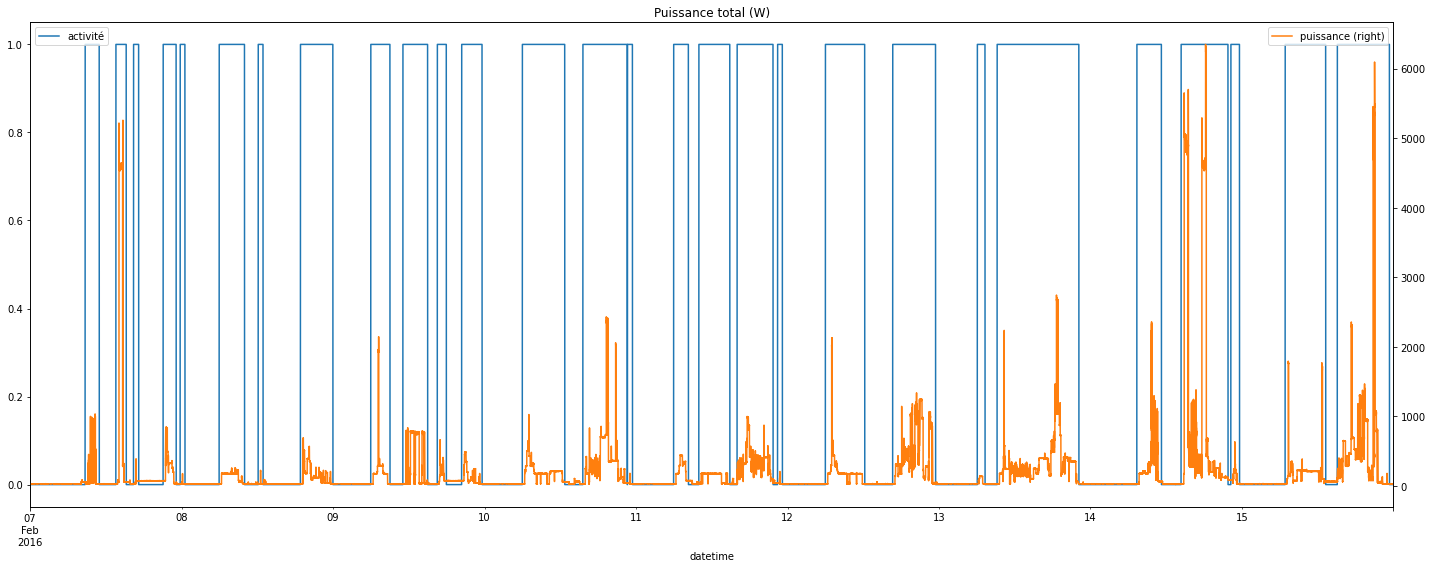

In [10]:
fig, ax = plt.subplots(1,1 , figsize=(20,8))

house1_power_blk1['activity'].plot(label='activité', ax=ax);
axr = house1_power_blk1[labels_active].sum(axis=1).plot(title=f'Puissance total (W)',secondary_y=True, label='puissance', ax=ax);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

fig.tight_layout();

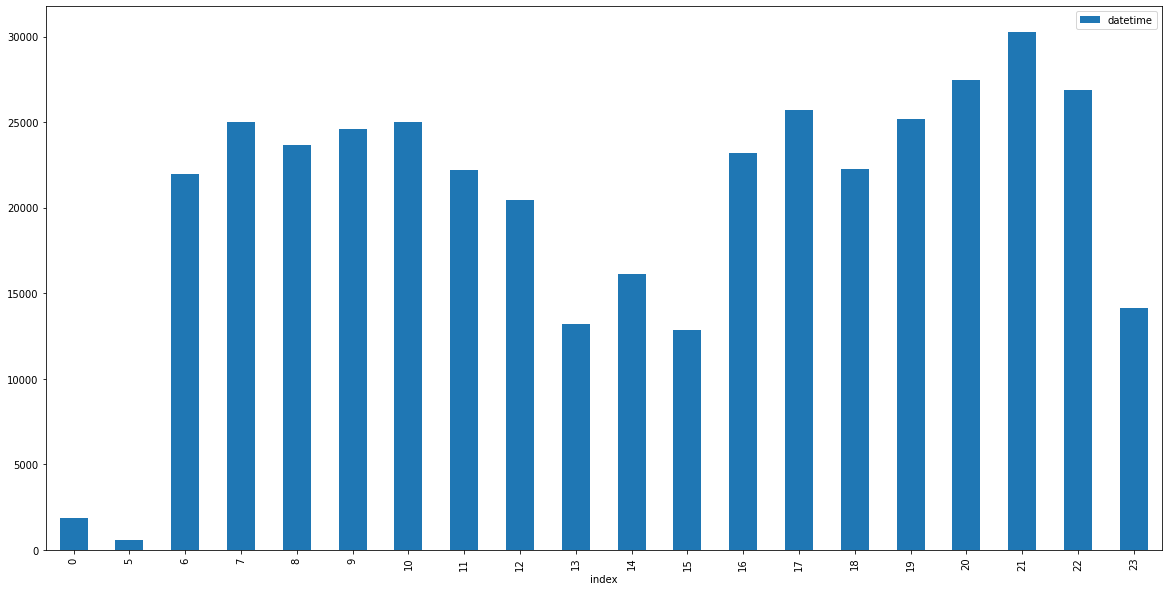

In [11]:
pd.DataFrame(house1_power_blk1[house1_power_blk1['activity'] > 0].index.hour.value_counts()).reset_index(drop=False).sort_values(by='index').plot.bar(x='index', y='datetime', figsize=(20,10), legend='Histogramme activité=f(heure)');

## Généralisation sur les 63 jours

In [5]:
house1_power_blk2 = pd.read_csv('data/house1_power_blk2.zip')
house1_power_blk2['datetime'] = pd.to_datetime(house1_power_blk2['unix_ts'], unit='s')

house1_power_blk2['datetime'] = house1_power_blk2['datetime'] - pd.Timedelta("8 hours")

house1_power_blk2 = house1_power_blk2.set_index(house1_power_blk2['datetime'])
house1_power_blk2 = house1_power_blk2.drop(columns=['unix_ts', 'datetime'])

for group in all_groups:
    sub_id = h1_labels.loc[h1_labels['group'] == group, 'id'].values
    house1_power_blk2[group] = house1_power_blk2[sub_id].sum(axis=1)
    house1_power_blk2 = house1_power_blk2.drop(columns=sub_id)

house1_power_blk2.head()

,ihd,mains,Kitchen Wall Oven,Kitchen Counter Plugs,Clothes Dryer,Upstairs Bedroom AFCI Arc-Fault Plugs,Kitchen Fridge,Clothes Washer,Kitchen Dishwasher,Furnace & Hot Water Unit,Basement Plugs & Lights,Heat Pump,Garage Sub-Panel,Upstairs Plugs & Lights,Basement Blue Plugs,Bathrooms,Rental Suite Sub-Panel,Misc. Plugs,Home Office
datetime,,,,,,,,,,,,,,,,,,,
2016-03-06 00:00:00,NaN,473.0,1.0,1.0,0.0,5.0,0.0,0.0,0.0,161.0,112.0,37.0,0.0,9.0,20.0,3.0,46.0,0.0,78.0
2016-03-06 00:00:01,NaN,474.0,1.0,2.0,0.0,6.0,0.0,0.0,0.0,161.0,112.0,37.0,0.0,9.0,20.0,2.0,46.0,0.0,78.0
2016-03-06 00:00:02,NaN,476.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,162.0,112.0,38.0,0.0,9.0,20.0,2.0,47.0,0.0,78.0
2016-03-06 00:00:03,NaN,476.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,161.0,112.0,36.0,0.0,9.0,23.0,2.0,47.0,0.0,78.0
2016-03-06 00:00:04,NaN,475.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,161.0,112.0,38.0,0.0,9.0,21.0,2.0,46.0,0.0,78.0


In [8]:
#house1_power_blk2['activity'] = pd.Series(data=np.zeros(len(house1_power_blk2)), index=house1_power_blk2.index, dtype=np.int8)
house1_activity_blk2 = pd.DataFrame()

for i, group in enumerate(all_groups):
    #if not h1_labels.loc[h1_labels['group'] == all_groups[i], 'activity'].any():
    #    continue

    house1_activity_blk2[group] = ((((house1_power_blk2[group] > house1_power_blk2[group].mean() + house1_power_blk2[group].std() * params.loc[i, 'tol1mul'])*1).rolling(params.loc[i, 'rolling'], center=True).mean() > params.loc[i, 'tol2'])*1)


house1_power_blk2['activity'] = (house1_activity_blk2[labels_active].any(axis=1))*1

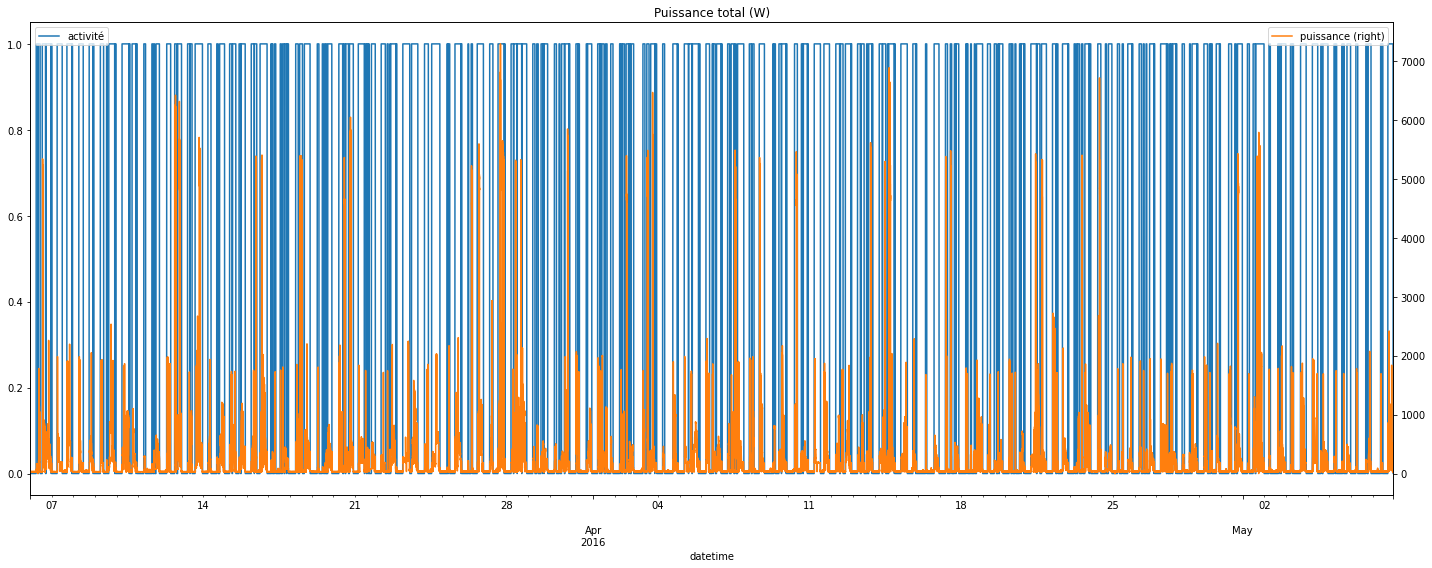

In [9]:
fig, ax = plt.subplots(1,1 , figsize=(20,8))

house1_power_blk2['activity'].plot(label='activité', ax=ax);
axr = house1_power_blk2[list(set(labels_active) & set(all_groups))].sum(axis=1).plot(title=f'Puissance total (W)',secondary_y=True, label='puissance', ax=ax);

ax.legend(loc='upper left');
axr.legend(loc='upper right');

fig.tight_layout();

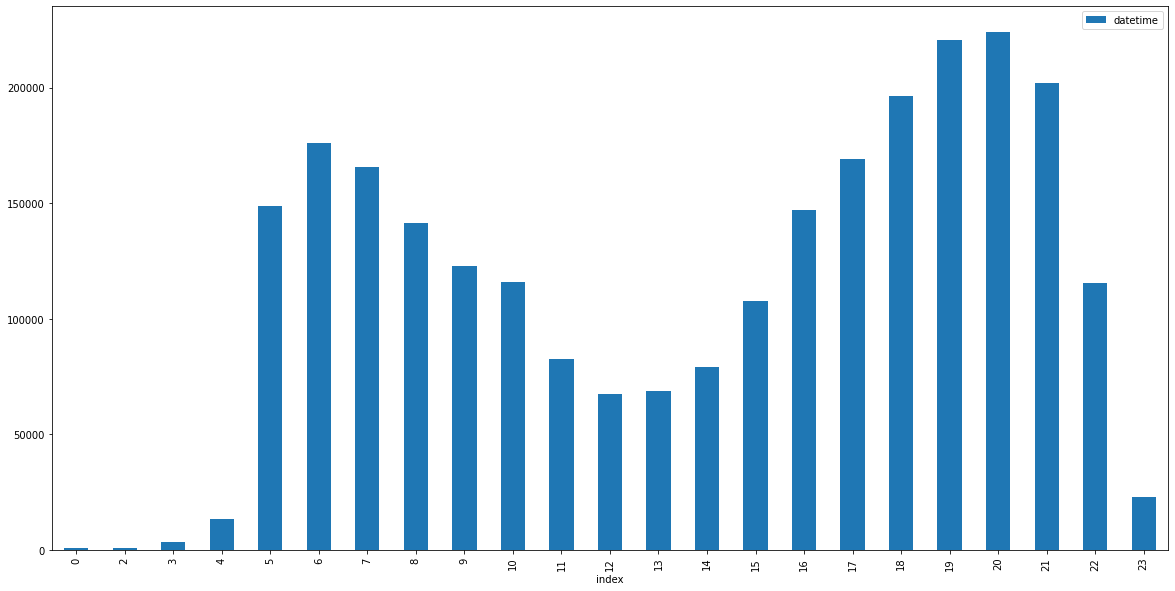

In [16]:
pd.DataFrame(house1_power_blk2[house1_power_blk2['activity'] > 0].index.hour.value_counts()).reset_index(drop=False).sort_values(by='index').plot.bar(x='index', y='datetime', figsize=(20,10), legend='Histogramme activité=f(heure)');

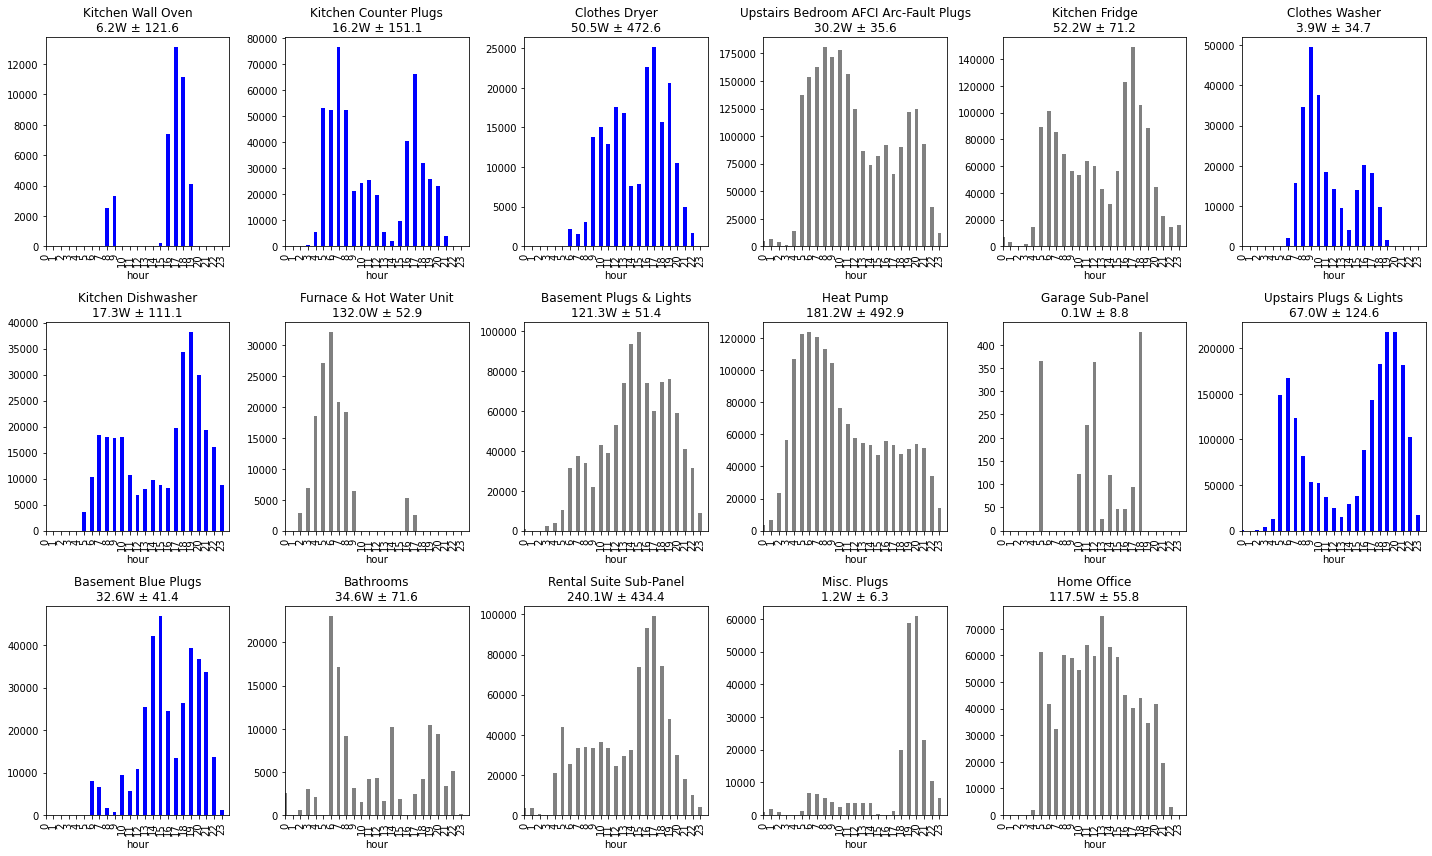

In [9]:
# we prepare our plot
fig = plt.figure(figsize=(20, 12));

# for each column
for k, col in enumerate(all_groups):
    # we add a subplot
    ax = fig.add_subplot(3, 6, k+1)

    pd.DataFrame(house1_activity_blk2[house1_activity_blk2[col] > 0].index.hour.value_counts(), index=range(24)).reset_index(drop=False).sort_values(by='index').plot.bar(x='index', y='datetime', color='blue' if col in labels_active else 'grey', legend=None, ax=ax);
    ax.set_xlim(0, 24)
    #pd.DataFrame(house1_activity_blk2[house1_activity_blk2[col] > 0].index.hour).reset_index(drop=False).sort_values(by='index').plot(kind='hist', width=0.7, x='index', y='datetime', legend='Histogramme '+col, color='blue' if col in labels_active else 'grey', bins=range(24), ax=ax);
    
    ax.set_xlabel('hour')
    ax.set_title(f'{col}\n{house1_power_blk2[col].mean():.1f}W ± {house1_power_blk2[col].std():.1f}')

plt.tight_layout()
plt.show();

In [37]:
house1_power_blk2[['mains', 'activity']].to_csv('house1_power_blk2_labels.csv')